In [28]:
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
import math
from matplotlib.pyplot import figure
import tensorflow as tf
from tensorflow.keras.layers import Dense

In [29]:
df = pd.read_csv('bank-additional-full.csv', sep =  ';')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Visualization

In [30]:
def countplot(columns):
    plt.figure(figsize=(20,10))
    plot=sns.countplot(x=columns,data=df)
    plt.show()

## Age

In [31]:
df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

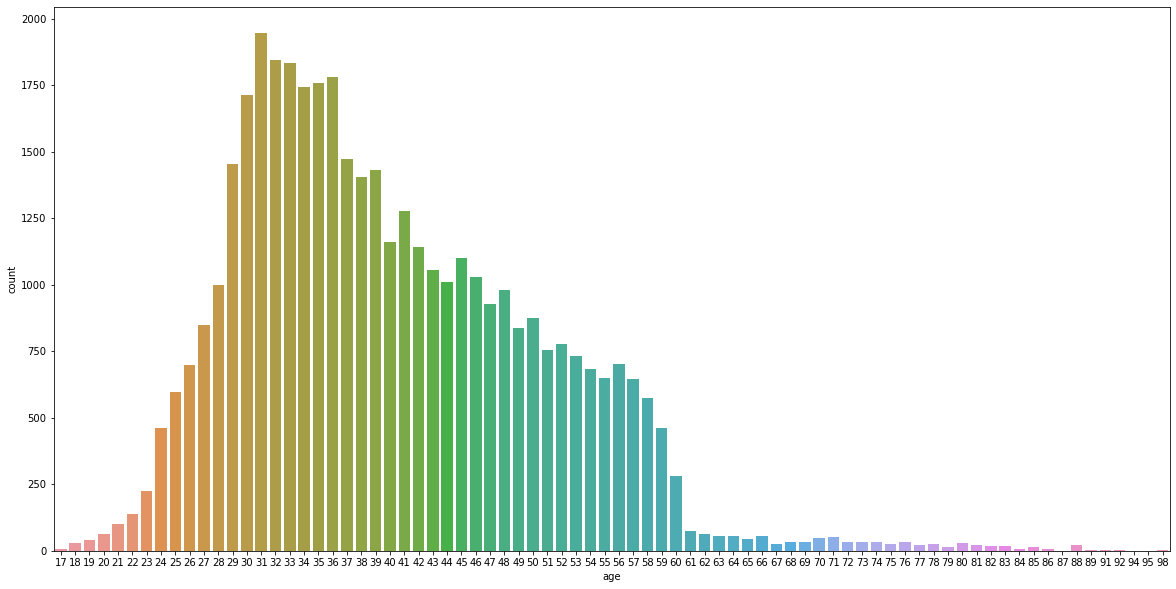

In [32]:
countplot('age')

## Job

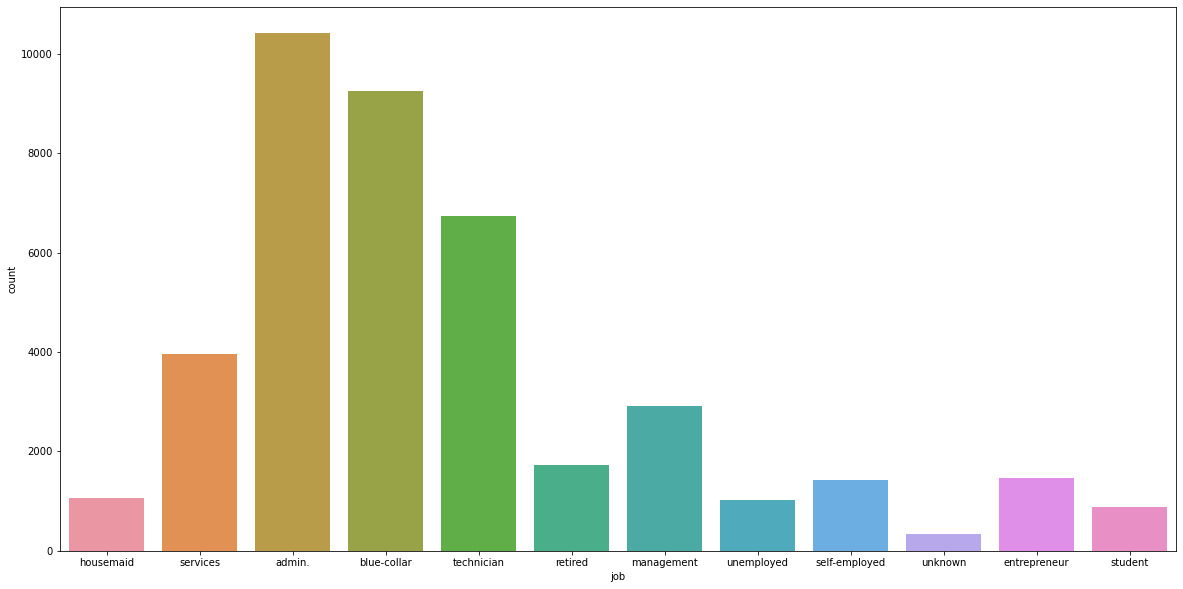

In [33]:
countplot('job')

## Marital

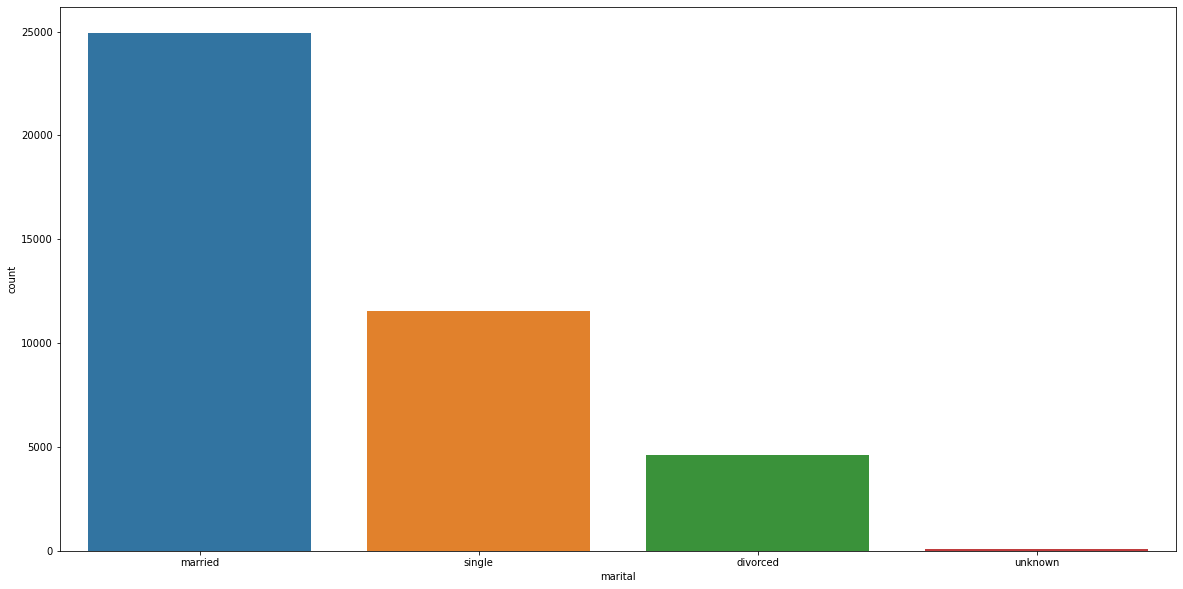

In [34]:
countplot('marital')

## Education

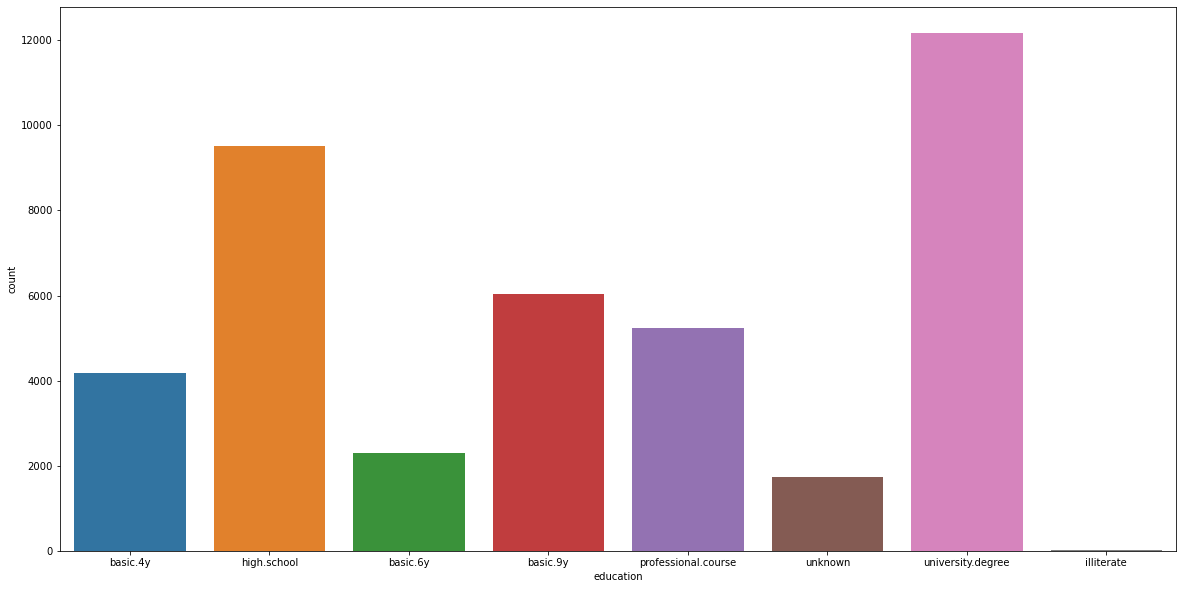

In [35]:
countplot('education')

## Contact

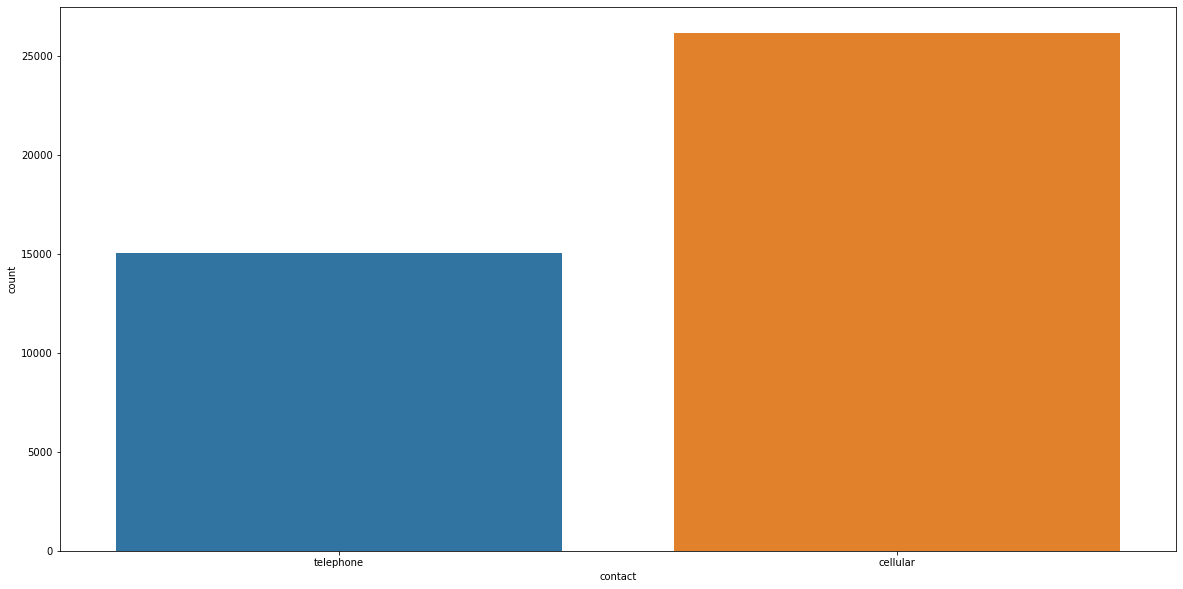

In [36]:
countplot('contact')

## Month

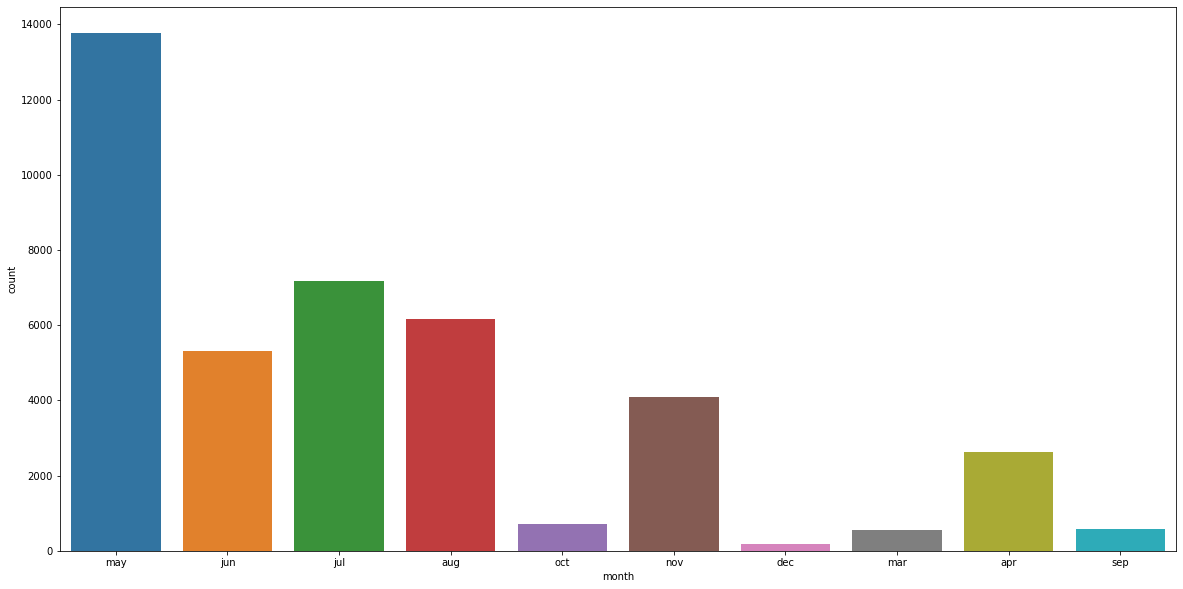

In [37]:
countplot('month')

## Day of week

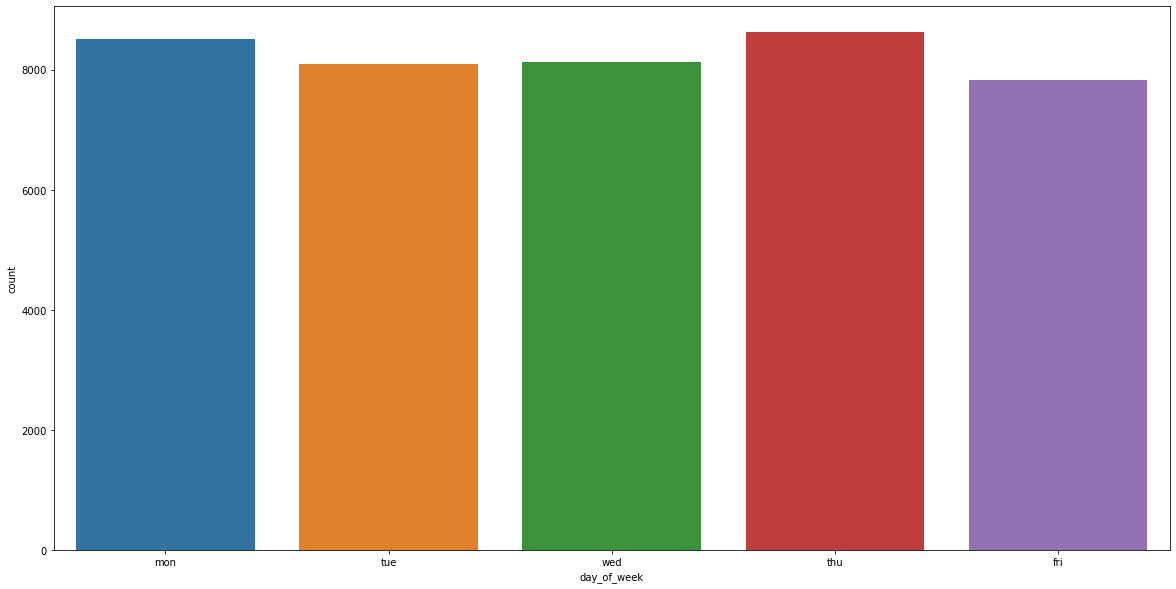

In [38]:
countplot('day_of_week')

## Previous days

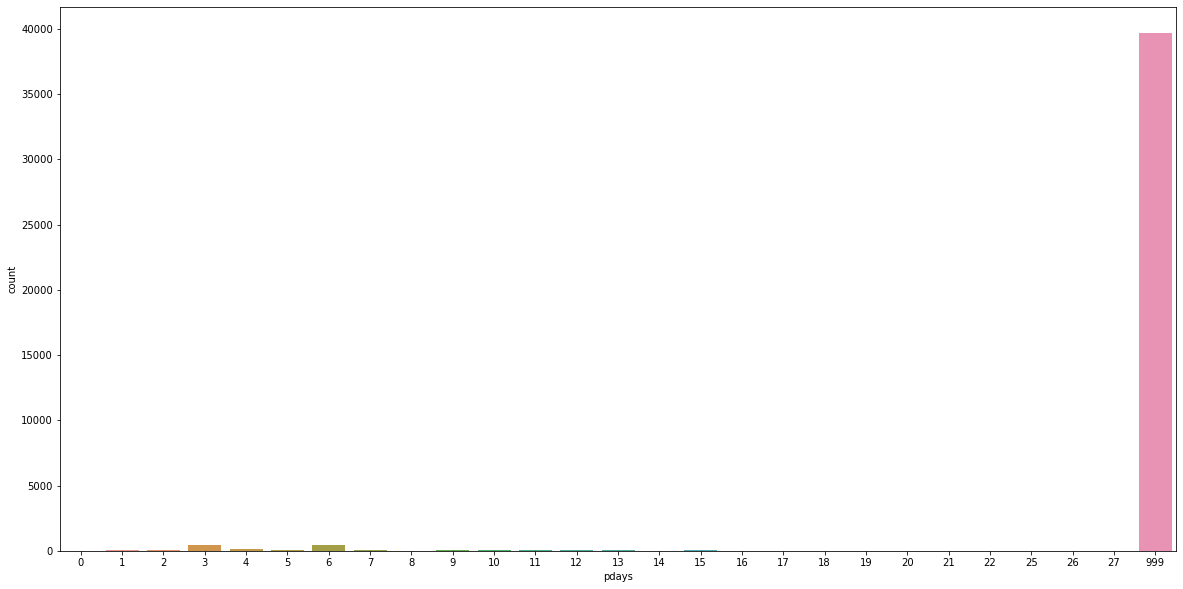

In [39]:
countplot('pdays')

## poutcome

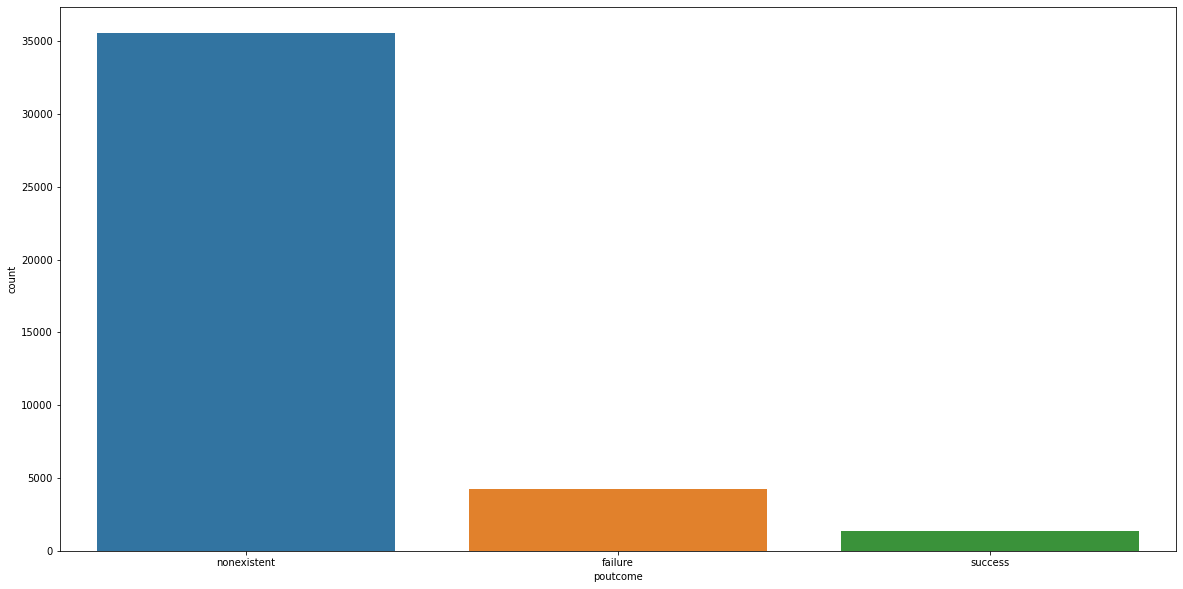

In [40]:
countplot('poutcome')

# Tiền xử lý dữ liệu

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [42]:
# Thay unknow bằng giá trị Null
df.replace("unknown", np.nan, inplace=True)

# Phần trăm Null
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis = 1, keys = ['Total', '%'])
print(missing_data.head(20))

# Xóa các dòng có giá trị Null
df.dropna(inplace=True)

                Total     %
default          8597  20.9
education        1731   4.2
housing           990   2.4
loan              990   2.4
job               330   0.8
marital            80   0.2
age                 0   0.0
poutcome            0   0.0
nr.employed         0   0.0
euribor3m           0   0.0
cons.conf.idx       0   0.0
cons.price.idx      0   0.0
emp.var.rate        0   0.0
duration            0   0.0
previous            0   0.0
pdays               0   0.0
campaign            0   0.0
day_of_week         0   0.0
month               0   0.0
contact             0   0.0


In [43]:
# Giữ lại dòng đầu của các dòng có giá trị giống nhau
df.drop_duplicates(keep='first', inplace=True)

# Xóa cột durations
df.drop(columns='duration', axis=1, inplace=True)

# Kiểm tra số lượng Null của các cột
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

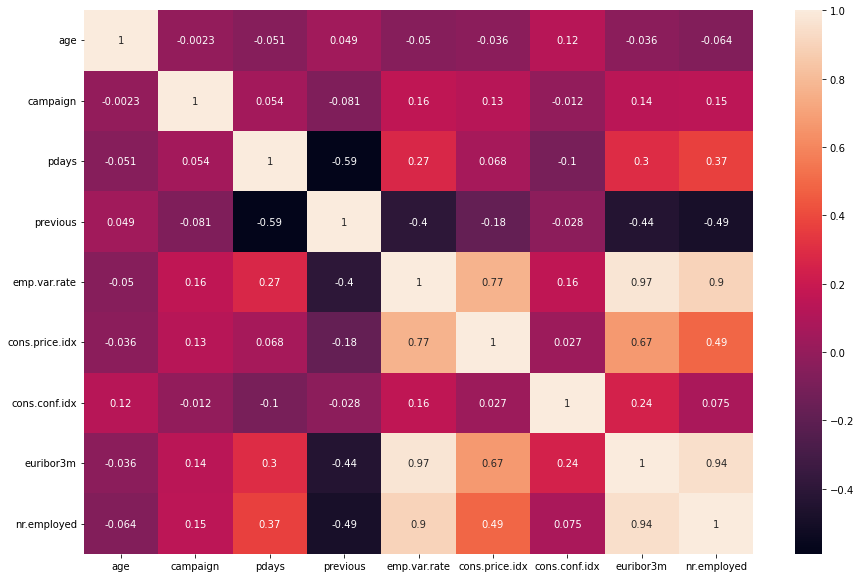

In [44]:
# Vẽ ma trận thể hiện độ tương quan bằng phương pháp Pearson
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson'), annot=True);

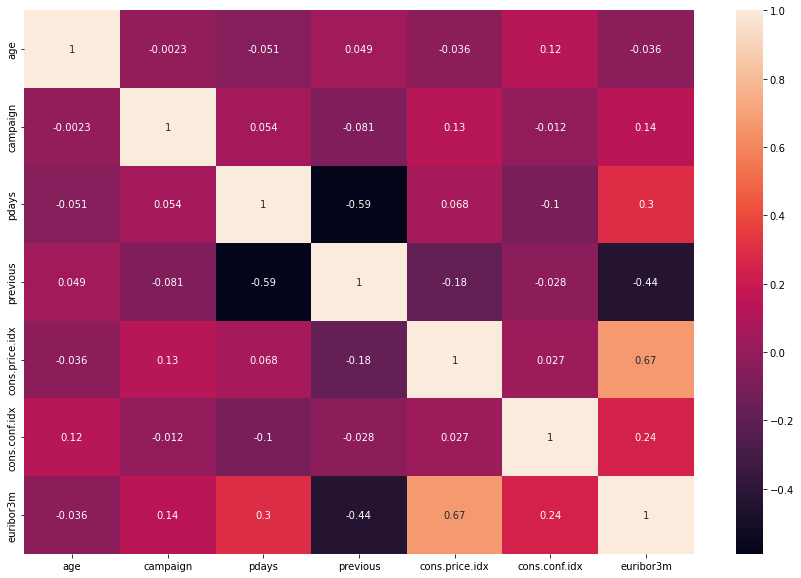

In [45]:
# Xóa emp.var.rate và nr.employed
df.drop(columns='emp.var.rate', axis=1, inplace=True)
df.drop(columns='nr.employed', axis=1, inplace=True)

# Vẽ ma trận độ tương quan
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson'), annot=True);

In [46]:
# Xử lý cột age bằng cách binding
for dataset in [df]:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[ dataset['age'] <= 32, 'age'] = 0
    dataset.loc[(dataset['age'] > 32) & (dataset['age'] <= 38), 'age'] = 1
    dataset.loc[(dataset['age'] > 38) & (dataset['age'] <= 47), 'age'] = 2
    dataset.loc[(dataset['age'] > 47) & (dataset['age'] <= 98), 'age'] = 3
    dataset.loc[ dataset['age'] > 98, 'age'] = 4

# Kiểm tra số lượng
df['age'].value_counts()

0    9370
1    7917
2    6877
3    6314
Name: age, dtype: int64

In [47]:
# Sử dụng phương pháp one hot encoding
ohe_data = pd.get_dummies(df, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'], drop_first=True)

In [48]:
# Chia dữ liệu thành features và labels
features = ohe_data.drop('y_yes', axis=1)
labels = ohe_data['y_yes']

# Chia dữ liệu train và test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Decision tree (ID3)

In [49]:
DT = DecisionTreeClassifier(criterion="entropy", random_state = 0)

# Tiến hành train model
start_time = time.time()
DT.fit(X_train, y_train)
end_time = time.time()

# Tiến hành dự đoán
DT_pred = DT.predict(X_test)

# Tính toán thời gian train model
DT_runtime = end_time - start_time

In [50]:
print('Thời gian chạy thuật là', DT_runtime)
DT_score = metrics.accuracy_score(y_test, DT_pred)
print("Accuracy", DT_score)
print("Report", metrics.classification_report(y_test, DT_pred))

Thời gian chạy thuật là 0.1779789924621582
Accuracy 0.8379265091863517
Report               precision    recall  f1-score   support

           0       0.91      0.91      0.91      5309
           1       0.37      0.37      0.37       787

    accuracy                           0.84      6096
   macro avg       0.64      0.64      0.64      6096
weighted avg       0.84      0.84      0.84      6096



Text(0.5, 1.0, 'Decision Tree Score: 83.78999999999999%')

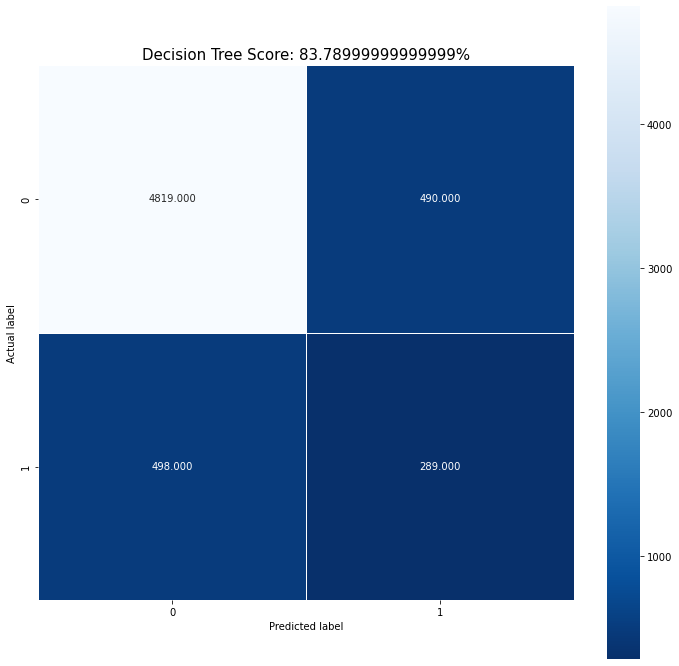

In [51]:
cm = metrics.confusion_matrix(y_test, DT_pred)
score = metrics.accuracy_score(y_test, DT_pred)

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Blues_r')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
title = "Decision Tree Score: {0}%".format(round(score, 4) * 100)
plt.title(title, size = 15)

In [52]:
#fig, ax = plt.subplots(figsize=(50, 24))
#plot_tree(DT, filled=True, fontsize=10)
#plt.savefig('DecisionTree', dpi=100)
#plt.show()

In [53]:
MSE = mean_squared_error(y_test, DT_pred)
print("Mean Square Error: " + str(MSE))
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: " + str(RMSE))
MAE = mean_absolute_error(y_test, DT_pred) 
print("Mean absolute error : " + str(MAE))
r2 = r2_score(y_test, DT_pred)
print('R Square:', r2)

Mean Square Error: 0.1620734908136483
Root Mean Square Error: 0.40258352029566274
Mean absolute error : 20.912073490813647
R Square: -0.4414993311685962
Mean Square Error: 362001938551783.25


# Random forest

In [54]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)

# Tiến hành train model
start_time = time.time()
RF.fit(X_train, y_train)
end_time = time.time()

# Tiến hành dự đoán
RF_pred = RF.predict(X_test)

# Tính toán thời gian train model
RF_runtime = end_time - start_time

In [55]:
print('Thời gian chạy thuật là', RF_runtime)
RF_score = metrics.accuracy_score(y_test, RF_pred)
print("Accuracy", RF_score)
print("Report", metrics.classification_report(y_test, RF_pred))

Thời gian chạy thuật là 2.7442405223846436
Accuracy 0.8779527559055118
Report               precision    recall  f1-score   support

           0       0.90      0.96      0.93      5309
           1       0.55      0.30      0.39       787

    accuracy                           0.88      6096
   macro avg       0.73      0.63      0.66      6096
weighted avg       0.86      0.88      0.86      6096



Text(0.5, 1.0, 'Random Forest Score: 87.8%')

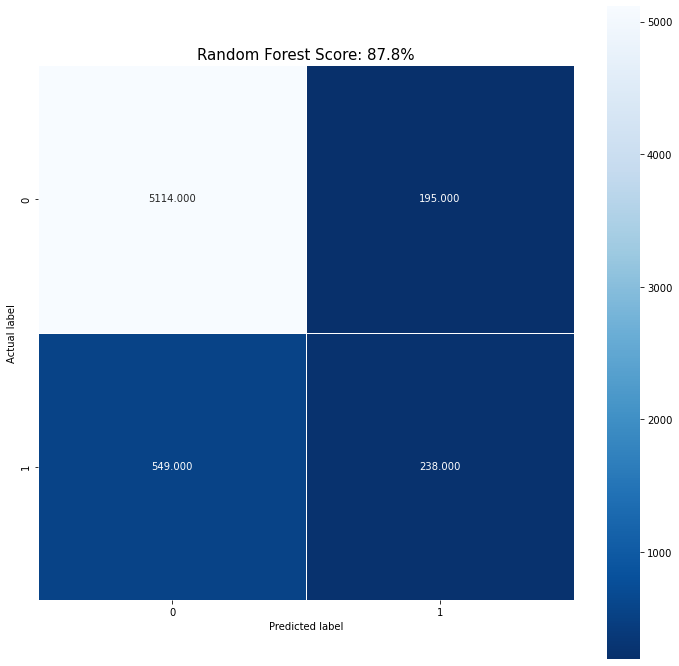

In [56]:
cm = metrics.confusion_matrix(y_test, RF_pred)
score = metrics.accuracy_score(y_test, RF_pred)

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Blues_r')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
title = "Random Forest Score: {0}%".format(round(score, 4) * 100)
plt.title(title, size = 15)

In [57]:
MSE = mean_squared_error(y_test, RF_pred)
print("Mean Square Error: " + str(MSE))
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: " + str(RMSE))
MAE = mean_absolute_error(y_test, RF_pred) 
print("Mean absolute error : " + str(MAE))
r2 = r2_score(y_test, RF_pred)
print('R Square:', r2)

Mean Square Error: 0.1220472440944882
Root Mean Square Error: 0.3493526071099058
Mean absolute error : 22.99704724409449
R Square: -0.08550152063708039


# Logistic Regession

In [58]:
LR = LogisticRegression(solver='liblinear', C=10.0, random_state=0)

# Tiến hành train model
start_time = time.time()
LR.fit(X_train, y_train)
end_time = time.time()

# Tiến hành dự đoán
LR_pred = LR.predict(X_test)

# Tính toán thời gian train model
LR_runtime = end_time - start_time 

In [59]:
print('Thời gian chạy thuật toán là', LR_runtime)
LR_score = LR.score(X_test, y_test)
print('Accuracy: ', LR_score * 100)
print("Report: ", metrics.classification_report(y_test, LR_pred))

Thời gian chạy thuật toán là 0.27068495750427246
Accuracy:  88.58267716535433
Report:                precision    recall  f1-score   support

           0       0.89      0.99      0.94      5309
           1       0.68      0.21      0.33       787

    accuracy                           0.89      6096
   macro avg       0.79      0.60      0.63      6096
weighted avg       0.87      0.89      0.86      6096



Text(0.5, 1.0, 'Logistic Regression Score: 88.58%')

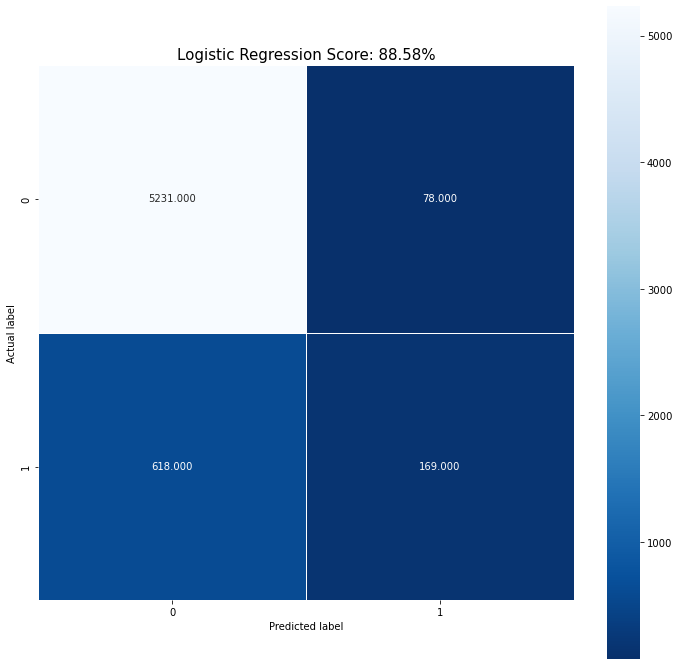

In [60]:
cm = metrics.confusion_matrix(y_test, LR_pred)
score = metrics.accuracy_score(y_test, LR_pred)

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Blues_r')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
title = "Logistic Regression Score: {0}%".format(round(score, 4) * 100)
plt.title(title, size = 15)

In [61]:
MSE = mean_squared_error(y_test, LR_pred)
print("Mean Square Error: " + str(MSE))
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: " + str(RMSE))
MAE = mean_absolute_error(y_test, LR_pred) 
print("Mean absolute error : " + str(MAE))
r2 = r2_score(y_test, LR_pred)
print('R Square:', r2)

Mean Square Error: 0.1141732283464567
Root Mean Square Error: 0.33789529198622564
Mean absolute error : 25.864173228346456
R Square: -0.01546916446694624


# Support Vector Classifier

In [62]:
SVC = svm.SVC()

# Tiến hành train model
start_time = time.time()
SVC.fit(X_train, y_train)
end_time = time.time()

# Tiến hành dự đoán
SVC_pred = SVC.predict(X_test)

# Tính toán thời gian train model
SVC_runtime = end_time - start_time 

In [63]:
print('Thời gian chạy thuật toán là', SVC_runtime)
SVC_score = SVC.score(X_test, y_test)
print('Accuracy: ', SVC_score * 100)
print("Report: ", metrics.classification_report(y_test, SVC_pred))

Thời gian chạy thuật toán là 14.447718143463135
Accuracy:  88.5498687664042
Report:                precision    recall  f1-score   support

           0       0.90      0.98      0.94      5309
           1       0.66      0.24      0.35       787

    accuracy                           0.89      6096
   macro avg       0.78      0.61      0.64      6096
weighted avg       0.87      0.89      0.86      6096



Text(0.5, 1.0, 'Support Vector Classifier Score: 88.55%')

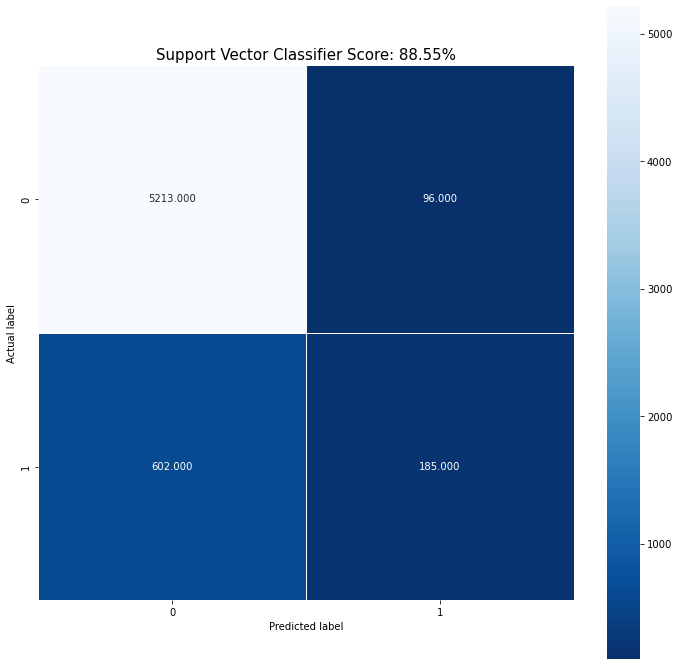

In [64]:
cm = metrics.confusion_matrix(y_test, SVC_pred)
score = metrics.accuracy_score(y_test, SVC_pred)

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Blues_r')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
title = "Support Vector Classifier Score: {0}%".format(round(score, 4) * 100)
plt.title(title, size = 15)

In [65]:
MSE = mean_squared_error(y_test, SVC_pred)
print("Mean Square Error: " + str(MSE))
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: " + str(RMSE))
MAE = mean_absolute_error(y_test, SVC_pred) 
print("Mean absolute error : " + str(MAE))
r2 = r2_score(y_test, SVC_pred)
print('R Square:', r2)

Mean Square Error: 0.114501312335958
Root Mean Square Error: 0.33838042546216823
Mean absolute error : 25.197834645669293
R Square: -0.01838717930736844


# ANN

In [66]:
ANN = tf.keras.Sequential()
ANN.add(Dense(units=16, input_dim=features.shape[1], activation='relu'))
ANN.add(Dense(units=16, activation='relu'))
ANN.add(Dense(units=1, activation='sigmoid'))

ANN.compile(optimizer='adam',
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])

hist = ANN.fit(X_train,y_train, batch_size=240 , epochs=10, verbose=1)

Epoch 1/10
102/102 [==============================] - 1s 2ms/step - loss: 0.7794 - accuracy: 0.8469
Epoch 2/10
102/102 [==============================] - 0s 2ms/step - loss: 0.3570 - accuracy: 0.8719
Epoch 3/10
102/102 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8743
Epoch 4/10
102/102 [==============================] - 0s 2ms/step - loss: 0.3245 - accuracy: 0.8778
Epoch 5/10
102/102 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8803
Epoch 6/10
102/102 [==============================] - 0s 3ms/step - loss: 0.3244 - accuracy: 0.8805
Epoch 7/10
102/102 [==============================] - 0s 3ms/step - loss: 0.3196 - accuracy: 0.8807
Epoch 8/10
102/102 [==============================] - 0s 3ms/step - loss: 0.3478 - accuracy: 0.8778
Epoch 9/10
102/102 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8818
Epoch 10/10
102/102 [==============================] - 0s 1ms/step - loss: 0.3162 - accuracy: 0.8836

In [67]:
ANN_pred = ANN.predict(X_test)

191/191 [==============================] - 0s 793us/step


In [68]:
ANN_pred = np.round(ANN_pred, 0).astype(int)

In [69]:
print(classification_report(y_test, ANN_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      5309
           1       0.58      0.33      0.42       787

    accuracy                           0.88      6096
   macro avg       0.74      0.65      0.68      6096
weighted avg       0.86      0.88      0.87      6096



Text(0.5, 1.0, 'ANN Accuracy Score: 0.8827099737532809')

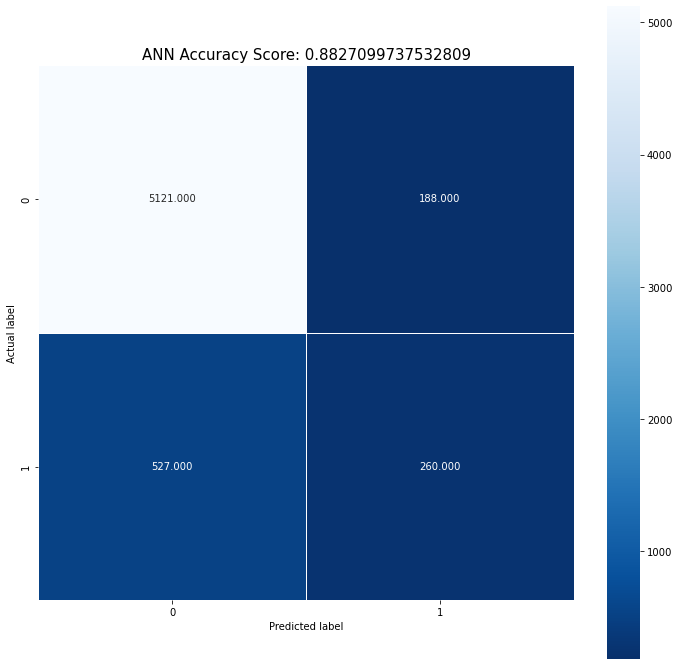

In [70]:
cm = metrics.confusion_matrix(y_test, ANN_pred)
score = metrics.accuracy_score(y_test, ANN_pred)

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Blues_r')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
title = "ANN Accuracy Score: {0}".format(score)
plt.title(title, size = 15)

In [71]:
MSE = mean_squared_error(y_test, ANN_pred)
print("Mean Square Error: " + str(MSE))
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: " + str(RMSE))
MAE = mean_absolute_error(y_test, ANN_pred) 
print("Mean absolute error : " + str(MAE))
r2 = r2_score(y_test, ANN_pred)
print('R Square:', r2)

Mean Square Error: 0.11729002624671916
Root Mean Square Error: 0.34247631486968433
Mean absolute error : 0.11729002624671916
R Square: -0.0431903054509577
